### Sprawozdanie - Generatory Liczb Losowych
<div style="text-align: right"> Wojciech Kosztyła </div>


In [36]:
import random
import numpy as np
import random
import scipy as cp
from math import *
import matplotlib.pyplot as plt

#### Zadanie 1 - Testowanie generatorów liczb losowych

Dla obydwu generatorów liczb losowych (Mersenne Twister oraz PCG64) oraz dla $n=10,1000,5000$ wylosuj $n$ liczb losowych pochodzących z rozkładu jednostajnego i wykonaj następujące kroki.
1. Zwizualizuj na wykresie rozkład liczb w 10 równych przedziałach.
2. Sprawdź, dla ilu liczb spełniona jest nierówność $x_{i} < x_{i+1}$. Ile powinno ich być dla idealnego generatora?
3. Zaimplementuj jeden z testów zdefiniowanych w rozdziale drugim artykułu [(link)](https://csrc.nist.gov/publications/detail/sp/800-22/rev-1a/final) i wykorzystaj go do sprawdzenia wylosowanego ciągu liczb.

Czy widać różnice pomiędzy generatorami? Czy wraz z rosnącym $n$ coś się zmienia?

Zaimplementowalem tworzenie histogramu na te dwa sposoby.

Wybrany przeze mnie test, to "Frequency (Monobit) Test", przy czym korzystam z przybliżenia wylosowanej liczby z zakresu [0,1) do bita.

In [37]:
def histogram_MarsenneTwister(n, ilosc_przedzialow):
    histogram = []
    for _ in range(ilosc_przedzialow):
        histogram.append(0)

    for _ in range(n):
        wylosowana_wartosc = random.uniform(0,1)

        for i in range(ilosc_przedzialow):
            if wylosowana_wartosc >= i/ilosc_przedzialow and wylosowana_wartosc < (i+1)/ilosc_przedzialow:
                histogram[i] += 1
                break

    return histogram

def histogram_MCG64(n, ilosc_przedzialow):
    histogram = []
    for _ in range(ilosc_przedzialow):
        histogram.append(0)

    for _ in range(n):
        wylosowana_wartosc = np.random.uniform()

        for i in range(ilosc_przedzialow):
            if wylosowana_wartosc >= i/ilosc_przedzialow and wylosowana_wartosc < (i+1)/ilosc_przedzialow:
                histogram[i] += 1
                break

    return histogram

print(" MarsenneTwister:\n Wartości poszczególnych 'kolumn': {} \n".format(histogram_MarsenneTwister(5000, 10)))
print(" MCG64:\n Wartości poszczególnych 'kolumn': {} \n".format(histogram_MCG64(5000, 10)))

 MarsenneTwister:
 Wartości poszczególnych 'kolumn': [489, 453, 516, 514, 495, 493, 502, 535, 514, 489] 

 MCG64:
 Wartości poszczególnych 'kolumn': [550, 520, 515, 465, 530, 497, 474, 438, 510, 501] 



Ta wersja implementacji wykonywała pierwszą, a zarazem najistotniejszą część zadania - generowała histogram (jeszcze nie wizualnie) z losowych wartości.

Jesteśmy też w stanie stwierdzić, czy jest to rzeczywiście rozkład jednostajny - na to wygląda, gdyż nie ma żadnych "rzucających się w oczy" "górek".

Następnie rozszerzyłem te implementacje o podpunkty 2.(zliczenie wystąpień nierówności) i 3.(implementacja jednego z testów).

In [38]:
def histogram_MarsenneTwister(n, ilosc_przedzialow):
    histogram = []
    for _ in range(ilosc_przedzialow):
        histogram.append(0)

    licznik_warunku = 0     # do podpunktu 2
    ostatnia_wartosc = 1000

    temp_suma = 0

    for _ in range(n):
        wylosowana_wartosc = random.uniform(0,1)
        if wylosowana_wartosc > ostatnia_wartosc:
            licznik_warunku+=1

        if wylosowana_wartosc>=0.5:
            temp_suma+=1
        else:
            temp_suma-=1

        for i in range(ilosc_przedzialow):
            if wylosowana_wartosc >= i/ilosc_przedzialow and wylosowana_wartosc < (i+1)/ilosc_przedzialow:
                histogram[i] += 1
                break
        ostatnia_wartosc = wylosowana_wartosc

    return histogram, licznik_warunku, erfc(abs(temp_suma)/sqrt(2*n))

def histogram_MCG64(n, ilosc_przedzialow):
    histogram = []
    for _ in range(ilosc_przedzialow):
        histogram.append(0)

    licznik_warunku = 0
    ostatnia_wartosc = 1000

    temp_suma = 0

    for _ in range(n):
        wylosowana_wartosc = np.random.uniform()
        if wylosowana_wartosc > ostatnia_wartosc:
            licznik_warunku+=1

        if wylosowana_wartosc>=0.5:
            temp_suma+=1
        else:
            temp_suma-=1

        for i in range(ilosc_przedzialow):
            if wylosowana_wartosc >= i/ilosc_przedzialow and wylosowana_wartosc < (i+1)/ilosc_przedzialow:
                histogram[i] += 1
                break
        ostatnia_wartosc = wylosowana_wartosc

    return histogram, licznik_warunku, erfc(abs(temp_suma)/sqrt(2*n))


temp_histogram_MarsenneTwister, l, erfc_MarsenneTwister = histogram_MarsenneTwister(5000, 10)
print(" MarsenneTwister:\n Wartości poszczególnych 'kolumn': {} \n Ilosc prawd warunku 2) :{} \t Wynik testu (jeśli >=0.01 to zbiór jest losowy): {}\n".format(temp_histogram_MarsenneTwister, l, erfc_MarsenneTwister))

temp_histogram_MCG64, l, erfc_MCG64 = histogram_MCG64(5000, 10)
print(" MCG64:\n Wartości poszczególnych 'kolumn': {} \n Ilosc prawd warunku 2) :{} \t Wynik testu (jeśli >=0.01 to zbiór jest losowy): {}\n".format(temp_histogram_MCG64, l, erfc_MCG64))

 MarsenneTwister:
 Wartości poszczególnych 'kolumn': [496, 499, 498, 521, 502, 470, 490, 495, 511, 518] 
 Ilosc prawd warunku 2) :2515 	 Wynik testu (jeśli >=0.01 to zbiór jest losowy): 0.6508740052044173

 MCG64:
 Wartości poszczególnych 'kolumn': [531, 529, 514, 453, 526, 515, 479, 485, 483, 485] 
 Ilosc prawd warunku 2) :2498 	 Wynik testu (jeśli >=0.01 to zbiór jest losowy): 0.13385641336489187



Co do podpunktu 2. - nierówność $x_{i} < x_{i+1}$ spełniana jest przez połowę z wylosowanych liczb.

Uzasadnienie można szukać w statystyce - skoro jest to rozkład jednostajny, to prawdopodobieństwo wylosowania po liczbie $x_{i}$ liczby większej jest równe $1 - x_{i}$, a wartość oczekiwana to $0.5$.
Jest to zależność liniowa, więc można prosto przekształcić $average(1 - x_{i}) = 1 - wartość oczekiwana = 1 - 0.5 = 0.5$

"Rzucamy $n$ razy monetą i zliczamy wypadnięcia reszki".

Co do podpunktu 3. - Test sprawdza proporcję zer do jedynek (a w tym przypadku liczb z przedziału $[0,0.5)$ i $[0.5,1)$).

Taka zamiana jest jak najbardziej poprawna, gdyż poprawny generator liczb losowych powinien wylosować taką samą ilość liczb w dwóch przedziałach równej długości.

Wartość "*erfc(abs(temp_suma)/sqrt(2n))*" to tzw. "*P-value*".
Gdyby była ona mała, świadczyłoby to, że "*temp_suma*" wyszła duża, a ta z kolei powinna oscylować blisko 0.

In [39]:
def rysuj_histogram_10czesci(temp_histogram, tytul="Histogram"):
    x = np.linspace(start=0, stop=1, num=10, endpoint=False)
    #plt.bar(x+0.05, height=temp_histogram_MCG64, width=0.1)
    fig1, ax1 = plt.subplots(figsize=(8,4))
    ax1.set_title(tytul)
    ax1.set_xlabel("Wartość losowanych liczb")
    ax1.set_ylabel("Ilość wystąpień")

    ax1.bar(x+0.05, height=temp_histogram[0], width=0.095, label="P-value:" + str(temp_histogram[2]))
    ax1.legend()
    fig1.show()

Funkcja powyżej narysuje żądany histogram, korzystając z matplotlib.pyplot

N = 10


<ipython-input-39-430a5ac38f1d>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


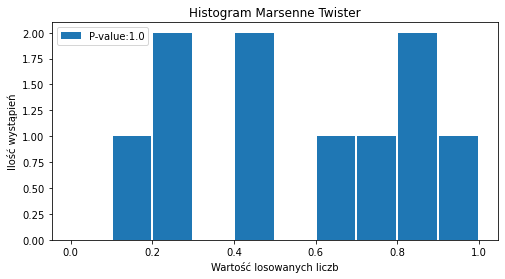

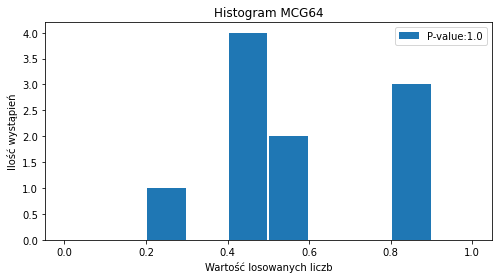

In [40]:
print("N = 10")
rysuj_histogram_10czesci(histogram_MarsenneTwister(10, 10), tytul="Histogram Marsenne Twister")
rysuj_histogram_10czesci(histogram_MCG64(10, 10), tytul="Histogram MCG64")

N = 1000


<ipython-input-39-430a5ac38f1d>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


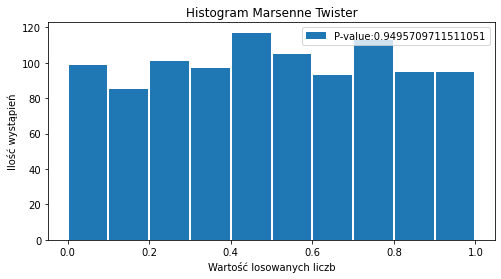

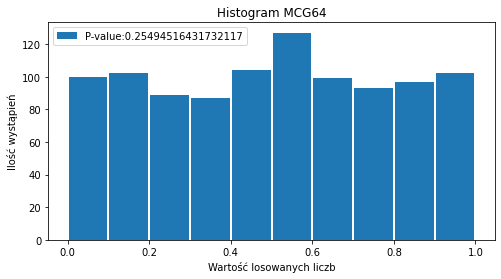

In [41]:
print("N = 1000")
rysuj_histogram_10czesci(histogram_MarsenneTwister(1000, 10), tytul="Histogram Marsenne Twister")
rysuj_histogram_10czesci(histogram_MCG64(1000, 10), tytul="Histogram MCG64")

N = 5000


<ipython-input-39-430a5ac38f1d>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


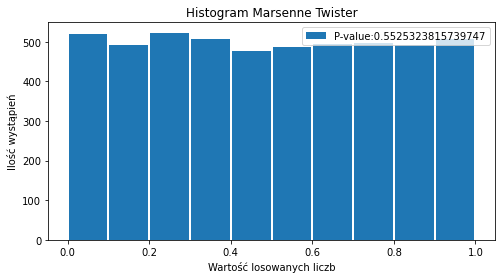

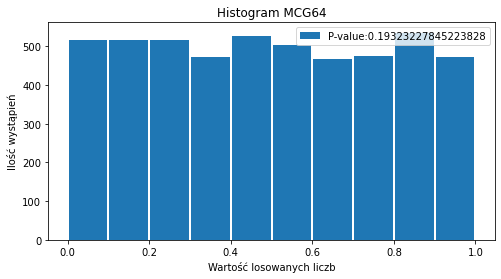

In [42]:
print("N = 5000")
rysuj_histogram_10czesci(histogram_MarsenneTwister(5000, 10), tytul="Histogram Marsenne Twister")
rysuj_histogram_10czesci(histogram_MCG64(5000, 10), tytul="Histogram MCG64")

Ciężko stwierdzić, czy istnieje różnica między tymi generatorami. Przy $N = 5000$ histogram stworzony przy użyciu *MMCG64* wydaje mi się bardziej równomierny, niż ten przy użyciu Marsenne Twister, lecz może też to być najzwyczajniej kwestia obecnego wygenerowania liczb losowych.

Wraz ze wzrostem liczby $n$ zwiększa się "wyrównanie" całego histogramu - dla $n=10$ histogram wcale nie uzwierciedla rozkładu jednostajnego, natomiast $n=5000$ ukazuje już w miarę równy rozkład.
